### Importacion de JSON (Twitter API)

In [1]:
!pip install tweepy

    100% |████████████████████████████████| 286kB 10.7MB/s 
  Running setup.py bdist_wheel for PySocks ... - done
  Stored in directory: /root/.cache/pip/wheels/22/5c/b5/12e0dfdfa85bea67b23628b6425fae715c687e947a45ee3df9
Successfully built PySocks


In [0]:
% matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import tweepy
import json
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
!pip install textblob

    100% |████████████████████████████████| 634kB 10.8MB/s 


In [0]:
import textblob

In [0]:
import tweepy

In [0]:
# Importacion y autenticacion de la api

# https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy


consumer_key="hBouEr3ZWShygODBg8XhvYBkC"
consumer_secret="Q3zdnfEeQT4Iin2gox9diuqnPG3C1FKVeJaDNtUBxDpYLYWfwL"

access_token="513564613-UTDdA7cZab7mZUoJd5eUQLc83SFza2I2KCkmkKSE"
access_token_secret="BdnfuvuoLaWzig09qDf59Ix22m8YV9qymQnjo1thOPygQ"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Instancio la API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [7]:
# Pruebo que funcione la API
print(api.me().name)

katja Joselyn


In [8]:

"""authors=['marianoobarrio','recondogaston','Reydeco76109764','lorenazvi','SandyCba25',
        'MiliSanchez57','Cecilia67392579','alejo65007005','Blablab25319048','jmnavas','NarwenRock',
         'MalbecYQueso','Perudefensavida','padre_sam','AaeFlores','VickyVillarruel','porlavida2014',
         'SebBolognese','realAlonsoDMD','BiondiniAR','lioOrtizdesign','Berlinabia','carlibarraza',
         'IsaCoachYVida','fjueguen','verolepera','gisellaLM','TvVallez','ofegal','danyelacar',
         'elianabled','VanesaReinoso7','EnamoSiempre','cordoba2016bis','evanahy80','bettyrava68',
         'Lovelaliarg','Dara68737232','Lujandavid3','An_Rosss','MaraCri15595144','javilo79',
         '9kamikaze','jjmhelguera']
list_tweets=[]

# Recorro todos los autores
for author in authors:
    print (author)
# Bajo los tweet de cada autor
#    tweets = api.user_timeline(screen_name=author, count = 1000, include_rts = False, tweet_mode='extended')
# Bajo los tweet segun hashtags
    tweets = tweepy.Cursor(api.search, q=author + ' -filter:retweets', lang='es', tweet_mode='extended').items(500)

    i = 0
    # Recorro todos los tweets
    for tweet in tweets:
        # Agrego los tweets a la lista
        list_tweets.append(tweet._json)
        i=i+1
    
    print (author + " " + str(i))

# Grabo los tweets en un archivo
with open('tweet_dh_test.json', 'w') as file:
        file.write(json.dumps(list_tweets, indent=4))
        
print("Descarga completa")
"""
authors=[
'#KeikoPresaPolitica',
'#KeikoNoEstaSola',
'#KeikoPerseguidaPolitica',
'#FujimorismoUnido',
'#GranMarchaFujimorista',
'#MásUnidosQueNunca',
'#KeikoPresaPolítica',
'#KeikoCreoEnTi',
'#KeikoNoEstáSola',
'#keikoLibertad',
'#FujimorismoUnido'
]

list_tweets=[]

# Recorro todos los autores
for author in authors:
    print (author)
# Bajo los tweet segun hashtags
    tweets = tweepy.Cursor(api.search, q=author + ' -filter:retweets', lang='es', tweet_mode='extended').items(900)

    i = 0
    # Recorro todos los tweets
    for tweet in tweets:
        # Agrego los tweets a la lista
        list_tweets.append(tweet._json)
        i=i+1
    
    print (author + " " + str(i))

# Grabo los tweets en un archivo
with open('tweet_dh_test.json', 'w') as file:
        file.write(json.dumps(list_tweets, indent=4))
        
print("Descarga completa")

#KeikoPresaPolitica
#KeikoPresaPolitica 900
#KeikoNoEstaSola
#KeikoNoEstaSola 304
#KeikoPerseguidaPolitica
#KeikoPerseguidaPolitica 268
#FujimorismoUnido
#FujimorismoUnido 41
#GranMarchaFujimorista
#GranMarchaFujimorista 1
#MásUnidosQueNunca
#MásUnidosQueNunca 605
#KeikoPresaPolítica


Rate limit reached. Sleeping for: 874


#KeikoPresaPolítica 900
#KeikoCreoEnTi
#KeikoCreoEnTi 141
#KeikoNoEstáSola
#KeikoNoEstáSola 304
#keikoLibertad
#keikoLibertad 82
#FujimorismoUnido
#FujimorismoUnido 41
Descarga completa


### Importacion de JSON

In [9]:

tweets_list = []

print("Iniciando importacion")

# Abro el archivo de los tweets
with open('tweet_dh_test.json', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    
# Recorro cada tweet
    for tweet in all_data:
        author = tweet['user']['screen_name']
        text = tweet['full_text']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        created_at = tweet['created_at']
# Concateno los hashtags
        hashtags = ''
        for hashtag in tweet['entities']['hashtags']:
            hashtags = hashtags + "#" + hashtag['text']
        
        tweets_list.append({
                            'author': str(author),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                             'hashtags': str(hashtags),
                            })

        tweet_json_a = pd.DataFrame(tweets_list, columns = 
                                  ['author', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at', 'hashtags'])
        
print ("Importacion completa")

Iniciando importacion
Importacion completa


In [10]:
tweet_json_a.groupby(['author']).size()


author
2MAnalytics        16
2X2dylan            2
94Gianela           5
99marichu           2
ABCCardinal         6
ABCDigital          2
ABCTVpy             1
ARaviolle           2
AaronRios90         2
AbahielEspinoza     4
Abencia_Meza       10
AceSalaverry        8
AdanRod06085577     4
AguaVivaValores     1
AguirreReyH         1
AlbaZaracho         1
AlcaldiaCucutaa     2
AlePeraltaKulik     5
Alejo15_56          2
AlfredoHinostro     1
AlhuayWendy         5
Alisch91            1
AlonsoVero          5
AlvaroThais         1
Ancahuasiperu       1
And3319             2
AndreaD40096353     1
AndreaValobra       3
AndreeCG            2
Andresbautistam     2
                   ..
valecazal           1
valeriabetg         2
veid23              4
velardealvaro       2
ventdecara          1
veritatisperu      24
vicent_aguilar      1
victori39804465    19
viejomininoperu     2
vince_bryce         6
viviana_abr         1
viviansanchez0      1
vivispinzi          1
vloayzasalazar      6
voi

In [11]:
 tweet_json_a = pd.DataFrame(tweets_list, columns = 
                                  ['author', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at', 'hashtags'])
tweet_json_a.head(600)

,author,text,favorite_count,retweet_count,created_at,hashtags
0,mconsueloav,@anatari33 @olopezm67 @congresoperu @FiscaliaP...,1,1,Thu Nov 08 23:50:59 +0000 2018,#bastadepersecusionpolitica#KeikoPresaPolitica
1,loyocm,Ya sabemos que si viene toledo este hunde a su...,0,1,Thu Nov 08 22:51:39 +0000 2018,#MediosArrodilladosNoTransmitenLavaJato#keikoP...
2,Ishaser1,#MarchaFujimorismoUnido\nVamos #FuerzaPopular\...,0,0,Thu Nov 08 22:44:58 +0000 2018,#MarchaFujimorismoUnido#FuerzaPopular#KeikoPre...
3,loyocm,@Pedro_Olaechea Asi ha actuado el mafioso gorr...,2,1,Thu Nov 08 22:39:24 +0000 2018,#MediosArrodilladosNoTransmitenLavaJato#keikoP...
4,loyocm,#vizcarradictador \nCon razon se contuvo de di...,1,1,Thu Nov 08 21:54:54 +0000 2018,#vizcarradictador#MediosArrodilladosNoTransmit...
5,rayfull6,@KeikoFujimori \n Dios no a muerto \n\n#keikon...,0,0,Thu Nov 08 21:05:44 +0000 2018,#keikonoestasola#KeikoPresaPolitica
6,danaloby,Periodista @romancendoya TRAPEA EL PISO y SE B...,25,19,Thu Nov 08 20:00:00 +0000 2018,#ParásitoMiserable#KeikoNoEstáSola#KeikoPresaP...
7,el_profheta,Alguie sabe porque en la dictadura de Fujimori...,0,0,Thu Nov 08 18:03:22 +0000 2018,#8Nov#KeikoPresaPolitica#Peru
8,perruanisimo,Como es que desde la cárcel puede tener linea ...,0,0,Thu Nov 08 16:43:39 +0000 2018,#KeikoALaReja#KeikoPresaPolitica#señoraK#Entel...
9,loyocm,#keikoPresaPolitica \nFP mas unidos que nunca ...,3,0,Thu Nov 08 16:08:26 +0000 2018,#keikoPresaPolitica


In [15]:
authors=[
    
    '#KeikoAlaReja',
    '#FujimoriNuncaMas',
    '#GanóLaDemocracia',
    '#KeikoSeCagóSeJodió',
    '#KeikOdebrecht',

    '#KeikoNoTeCreo',
    '#SraK',
    '#labotica',
    '#laseñoraK',
    '#keikoCTM',
    '#KeikoRCTMR',
    '#LaBotika',
    '#keikoALaCana',
    '#LaKupulaFujimoristaEsUnaOrganizacionKriminal',
    '#KeikoKorrupta',
    '#GanoLaDemocracia',
    '#Fujicocteles',
    '#ChatDeLaBotica',
    '#FujimorismoOrganizaciónCriminal', 
    '#FujimorismoNuncaMas']

list_tweets=[]

# Recorro todos los autores
for author in authors:
    print (author)
# Bajo los tweet segun hashtags
    tweets = tweepy.Cursor(api.search, q=author + ' -filter:retweets', lang='es', tweet_mode='extended').items(900)

    i = 0
    # Recorro todos los tweets
    for tweet in tweets:
        # Agrego los tweets a la lista
        list_tweets.append(tweet._json)
        i=i+1
    
    print (author + " " + str(i))

# Grabo los tweets en un archivo
with open('tweet_dh_test_b.json', 'w') as file:
        file.write(json.dumps(list_tweets, indent=4))
        
print("Descarga completa b")


Rate limit reached. Sleeping for: 740


#KeikoAlaReja
#KeikoAlaReja 900
#FujimoriNuncaMas
#FujimoriNuncaMas 900
#GanóLaDemocracia
#GanóLaDemocracia 219
#KeikoSeCagóSeJodió
#KeikoSeCagóSeJodió 27
#KeikOdebrecht
#KeikOdebrecht 1
#KeikoNoTeCreo
#KeikoNoTeCreo 323
#SraK


Rate limit reached. Sleeping for: 874


#SraK 132
#labotica
#labotica 705
#laseñoraK
#laseñoraK 20
#keikoCTM
#keikoCTM 8
#KeikoRCTMR
#KeikoRCTMR 24
#LaBotika
#LaBotika 210
#keikoALaCana
#keikoALaCana 19
#LaKupulaFujimoristaEsUnaOrganizacionKriminal
#LaKupulaFujimoristaEsUnaOrganizacionKriminal 1
#KeikoKorrupta
#KeikoKorrupta 2
#GanoLaDemocracia
#GanoLaDemocracia 219
#Fujicocteles
#Fujicocteles 7
#ChatDeLaBotica
#ChatDeLaBotica 2
#FujimorismoOrganizaciónCriminal
#FujimorismoOrganizaciónCriminal 30
#FujimorismoNuncaMas
#FujimorismoNuncaMas 270
Descarga completa b


In [16]:

tweets_list = []

print("Iniciando importacion")

# Abro el archivo de los tweets
with open('tweet_dh_test_b.json', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    
# Recorro cada tweet
    for tweet in all_data:
        author = tweet['user']['screen_name']
        text = tweet['full_text']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        created_at = tweet['created_at']
# Concateno los hashtags
        hashtags = ''
        for hashtag in tweet['entities']['hashtags']:
            hashtags = hashtags + "#" + hashtag['text']
        
        tweets_list.append({
                            'author': str(author),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                             'hashtags': str(hashtags),
                            })

        tweet_json_b = pd.DataFrame(tweets_list, columns = 
                                  ['author', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at', 'hashtags'])
        
print ("Importacion completa")

Iniciando importacion
Importacion completa


In [17]:
tweet_json_b.groupby(['author']).size()

author
1000ena             1
14_Ayrton           2
1509_robinson       1
1tiradorselecto     2
24HorasTV           2
2Mily0              1
2X2dylan            1
30marcos_           1
95mar14             1
963_shaw            1
ALarikko            7
ALpinchiste         2
ANANKA63            4
A_IgnacioRamos      7
AaronBlackSerie     8
AbigailNavarro      2
AbrahamAC97         2
Abrahamgrone97      2
AbueEncabronado     2
AbueloCavero        3
Agencia_Trinity     4
AlanBenavidesXX     2
Albatro_14          1
AlbertoHeck         1
AlcoveD             3
AlespaP             2
AlessandraCC257     1
AlexPMedina         3
AlexanderSCC14      1
AlexeyMario         1
                   ..
wlarosan            2
wolveruine          1
wseverino79         1
xGabrielx           1
xafu                1
xandel2             1
xiomy2016           8
xs_sales0606        1
yahuar              4
yanedia             1
yasamuco            7
yasgr18             2
yderepente          1
yfarfan14           1
yfr

In [0]:
# Analisis descriptivo de los yweets tweet_json_a

In [19]:
tweet_json_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3587 entries, 0 to 3586
Data columns (total 6 columns):
author            3587 non-null object
text              3587 non-null object
favorite_count    3587 non-null int64
retweet_count     3587 non-null int64
created_at        3587 non-null object
hashtags          3587 non-null object
dtypes: int64(2), object(4)
memory usage: 168.2+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


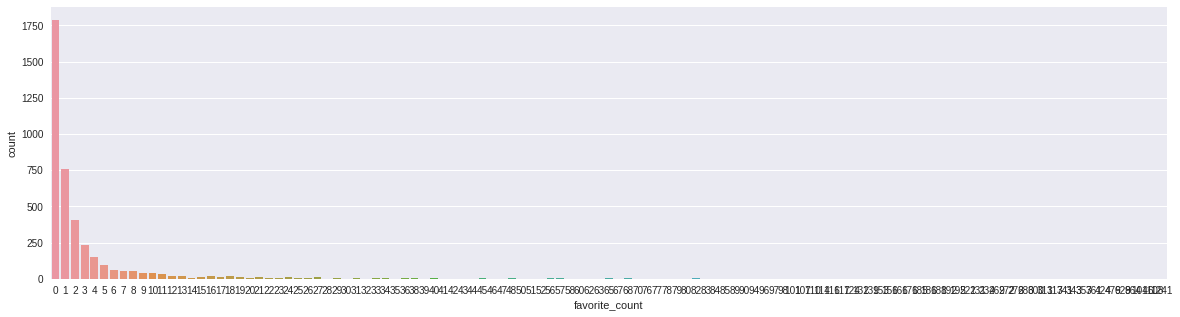

In [20]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x='favorite_count', data=tweet_json_b);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


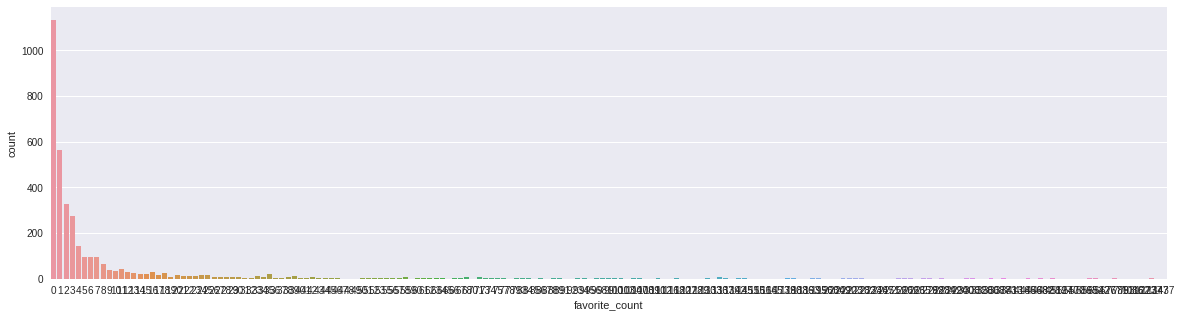

In [21]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x='favorite_count', data=tweet_json_a);

In [22]:
tweet_json_b.groupby(['hashtags']).head()

,author,text,favorite_count,retweet_count,created_at,hashtags
0,ALarikko,@RPPNoticias #RosaBartra #Edwinoviedo #AlanGar...,0,0,Thu Nov 08 17:01:53 +0000 2018,#RosaBartra#Edwinoviedo#AlanGarcia#ppk#KeikoAL...
1,perruanisimo,Como es que desde la cárcel puede tener linea ...,0,0,Thu Nov 08 16:43:39 +0000 2018,#KeikoALaReja#KeikoPresaPolitica#señoraK#Entel...
2,ashley60077585,@MecheAF @PedroChavarryV @FiscaliaPeru Keiko e...,0,0,Thu Nov 08 15:10:03 +0000 2018,#KeikoALaReja
3,BebetochavLui,@KeikoFujimori #KeikoALaReja AHORA QUE SALGAN ...,0,0,Thu Nov 08 14:41:11 +0000 2018,#KeikoALaReja
4,BebetochavLui,@KeikoFujimori #KeikoALaReja AHORA QUE SALGAN ...,0,0,Thu Nov 08 14:40:44 +0000 2018,#KeikoALaReja
5,BebetochavLui,@KeikoFujimori #KeikoALaReja AHORA QUE SALGAN ...,0,0,Thu Nov 08 14:40:01 +0000 2018,#KeikoALaReja
6,Camuspp,@KeikoFujimori Te creías intocable y mírate ah...,0,0,Thu Nov 08 03:11:55 +0000 2018,#KeikoALaReja
7,lorelyciousss,@KeikoFujimori Eso hubieras pensado antes de h...,0,0,Thu Nov 08 02:20:28 +0000 2018,#korrupcion#KeikoALaReja
8,MaryCarmenlp,"Pueden llamarlo Cantinflas, pero es de los poc...",0,0,Thu Nov 08 01:50:04 +0000 2018,#CerremosElCongreso#KeikoALaReja#alansiguestu
10,JineteOnirico,@Latina_Noticias Y ellos quieren dejar al país...,1,0,Thu Nov 08 00:05:20 +0000 2018,#KeikoALaReja#LavadoDeActivos


In [23]:
tweet_json_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3587 entries, 0 to 3586
Data columns (total 6 columns):
author            3587 non-null object
text              3587 non-null object
favorite_count    3587 non-null int64
retweet_count     3587 non-null int64
created_at        3587 non-null object
hashtags          3587 non-null object
dtypes: int64(2), object(4)
memory usage: 168.2+ KB


In [24]:
tweet_json_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 6 columns):
author            4019 non-null object
text              4019 non-null object
favorite_count    4019 non-null int64
retweet_count     4019 non-null int64
created_at        4019 non-null object
hashtags          4019 non-null object
dtypes: int64(2), object(4)
memory usage: 188.5+ KB


In [0]:
# Agregado de postura a favor del aborto (0 es a favor)
tweet_json_a['a_favor'] = 0

# Agregado de postura a favor del aborto (0 es a favor)
tweet_json_b['a_favor'] = 1



In [0]:
# Concatenar los dataframes
data = pd.concat([tweet_json_a, tweet_json_b])

In [27]:
# deberia dar 14162
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7606 entries, 0 to 4018
Data columns (total 7 columns):
author            7606 non-null object
text              7606 non-null object
favorite_count    7606 non-null int64
retweet_count     7606 non-null int64
created_at        7606 non-null object
hashtags          7606 non-null object
a_favor           7606 non-null int64
dtypes: int64(3), object(4)
memory usage: 475.4+ KB


In [28]:
data.sample(10)

,author,text,favorite_count,retweet_count,created_at,hashtags,a_favor
3211,willycunire,@MIKI_Torres_ @KeikoFujimori @LuzSalgado_R La ...,63,11,Mon Nov 05 23:08:48 +0000 2018,#LaSeñoraK,1
3966,rhonybs,@noticias_tvperu @TubinoCarlos Sólo será en la...,0,0,Wed Oct 31 01:45:51 +0000 2018,#FujimorismoNuncaMas,1
681,nico_nadramia96,"Me da pena por sus hijas, por ella y sobretod...",1,0,Thu Nov 01 01:37:48 +0000 2018,#KeikoALaReja,1
1442,loyocm,Se la saben todas ustedes ya le enmedaron la p...,3,2,Wed Oct 31 17:22:05 +0000 2018,#keikoPerseguidaPolítica,0
45,FernandaAranib,@Poder_Judicial_ @FiscaliaPeru @MinjusDH_Peru ...,3,3,Wed Nov 07 15:58:14 +0000 2018,#KeikoPresaPolitica,0
217,SOL_AGUSTIN,"@DiazNalu @romancendoya La verdad JODE, DICEN....",1,0,Sat Nov 03 22:03:22 +0000 2018,#KeikoPresaPOLITICA,0
839,PpKuis,Sería la primera vez que un “preso político” s...,220,82,Thu Nov 01 21:19:34 +0000 2018,#KeikoPresaPolitica,0
235,JaimeXavier007,#KeikoALaReja por soberbia! https://t.co/NizYk...,5,0,Thu Nov 01 18:21:47 +0000 2018,#KeikoALaReja,1
2813,marveluis_,Carhuancho está leyendo el chat de #LaBotica d...,0,0,Wed Oct 31 21:58:39 +0000 2018,#LaBotica,1
1575,MinTrabajoBol,Falleció exidirigente de #FSTMB y luchador inc...,1,8,Mon Nov 05 21:15:20 +0000 2018,#FSTMB#CiriloJiménez#mineros#MASUnidosQueNunca...,0


In [29]:
data[data['a_favor']==0].groupby('retweet_count')

#### Normalizacion del texto

In [30]:
# Minusculas
data['text'] = data['text'].str.lower()
data.sample(100)

,author,text,favorite_count,retweet_count,created_at,hashtags,a_favor
2788,RenzoMig32,"el ""mini juicio"" es un invento del juez concep...",0,1,Thu Nov 01 23:48:39 +0000 2018,#KeikoPresaPolitica,0
552,piernona1,giuliana loza: juez concepción ya adelantó opi...,21,11,Fri Nov 02 02:05:15 +0000 2018,#KeikoPresaPolitica,0
2406,alvarosarco,patricia del río desde ese desagüe llamado @rp...,595,210,Sat Nov 03 00:37:25 +0000 2018,#KeikoPresaPolitica,0
708,mili_ep,"a pero hace días bien risa y risa ella, su esp...",0,0,Thu Nov 01 01:27:35 +0000 2018,#KeikoALaReja,1
3578,jhonadf,"""esta parte de mi vida, esta pequeña parte, se...",9,3,Wed Oct 31 22:50:12 +0000 2018,#Keiko36meses#keikoalareja#GanolaDemocracia#Pr...,1
3907,AndresGervasi,el ocaso de los dioses\n#fujimorismonuncamas\n...,9,2,Thu Nov 01 01:13:49 +0000 2018,#FujimorismoNuncaMas#KeikoALaReja#Keiko36Meses,1
881,yudy_pamela,30 millones de peruanos se levantan y aplauden...,34,13,Thu Nov 01 00:34:53 +0000 2018,#KeikoALaReja#Keiko36Meses#FujimoriNuncaMas,1
157,jlcckoky,@toledocarrion @musux_ @cal_ef @hablavegas @ke...,0,0,Sun Nov 04 19:27:44 +0000 2018,#KeikoPresaPOLITICA#KeikoCreoEnTi,0
1042,elantipoda,cuando tu flaca te dice que vayas porque tiene...,0,0,Mon Nov 05 01:35:47 +0000 2018,#fujimorinuncamás,1
3575,juanmario1412,gran marcha #fujimorismounido #keikonoestásola...,3,1,Fri Nov 02 21:20:05 +0000 2018,#FujimorismoUnido#KeikoNoEstáSola,0


In [31]:
!pip install unidecode

    100% |████████████████████████████████| 235kB 7.3MB/s 


In [32]:
from unidecode import unidecode
data['text'] = data['text'].apply(unidecode)
data['text'].sample(100)

2355    @keikofujimori keiko creemos en ti en tu inoce...
3140                      #keikocreoenti todo saldra bien
1498    #fujimorinuncamas fujimoristas en un solo twee...
2881    #keikopresapolitica #keikopresapolitica especi...
3494    <<no hay lonche gratis" #aplausosprotocolares ...
692     @dn_mariano @richardmontoyar @lcbcasbo @loyocm...
3084    ahora le toca  al congreso no dejarse intimida...
3208    @jovenesconkeiko no me deja de sorprender el g...
152     #keikoalareja la sangre japonesa podria llevar...
1647    @estelaruizdiaz unos pocos resentidos pusieron...
1789    ahora alan gabriel ludwing garcia perez. arrib...
1468    pudiste pero la vida facil y tener el poder de...
763     me encanta viva el peru  #keikoalareja https:/...
703     #keikoalareja keiko a la reja, y peru al mundi...
2288    con ustedes el vocero de la era de la concerta...
3307    @jbcperu es muy triste lo q pasa con #keikofuj...
774     #keikopresapolitica y muy feliz https://t.co/j...
310     esta m

In [33]:
import re
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_colwidth', 1000)

#reemplazar el \n por un espacio
data['text'] = data['text'].str.replace('\n', ' ')

#remuevo los links
data['text'] = data['text'].str.replace('http\S+|www.\S+', '', case=False)

#Remuevo lo que no son letras salvo las personas y los hashtags
data['text'] = data['text'].apply(lambda x: re.sub(r'([^\s\w#@]|\_)+', '', x))

#Remuevo los numeros
data['text'] = data['text'].apply(lambda x: re.sub(r'\s(\d)+\s', ' ', x))

data.head(1000)



,author,text,favorite_count,retweet_count,created_at,hashtags,a_favor
0,mconsueloav,@anatari33 @olopezm67 @congresoperu @fiscaliaperu #bastadepersecusionpolitica todos los fujimoristas amigos y simpatizantes quedan invitados a la marcha en apoyo a nuestra lideresa keiko fujimori #keikopresapolitica,1,1,Thu Nov 08 23:50:59 +0000 2018,#bastadepersecusionpolitica#KeikoPresaPolitica,0
1,loyocm,ya sabemos que si viene toledo este hunde a su amigo ppk #mediosarrodilladosnotransmitenlavajato #keikopresapolitica,0,1,Thu Nov 08 22:51:39 +0000 2018,#MediosArrodilladosNoTransmitenLavaJato#keikoPresaPolitica,0
2,Ishaser1,#marchafujimorismounido vamos #fuerzapopular #keikopresapolitica #fujimorilibertad #masunidosquenunca,0,0,Thu Nov 08 22:44:58 +0000 2018,#MarchaFujimorismoUnido#FuerzaPopular#KeikoPresaPolítica#FujimoriLibertad#MásUnidosQueNunca,0
3,loyocm,@pedroolaechea asi ha actuado el mafioso gorriti montesinos y su idl desde hace anos #mediosarrodilladosnotransmitenlavajato #keikopresapolitica,2,1,Thu Nov 08 22:39:24 +0000 2018,#MediosArrodilladosNoTransmitenLavaJato#keikoPresaPolitica,0
4,loyocm,#vizcarradictador con razon se contuvo de disparar contra el fiscal en su ultima entrevista #mediosarrodilladosnotransmitenlavajato #keikopresapolitica,1,1,Thu Nov 08 21:54:54 +0000 2018,#vizcarradictador#MediosArrodilladosNoTransmitenLavaJato#KeikoPresaPolitica,0
5,rayfull6,@keikofujimori dios no a muerto #keikonoestasola #keikopresapolitica,0,0,Thu Nov 08 21:05:44 +0000 2018,#keikonoestasola#KeikoPresaPolitica,0
6,danaloby,periodista @romancendoya trapea el piso y se burla de la ignorancia del #parasitomiserable @idlrivera jajajaja @milagrosleivag le falto poco para aplaudir magistral faena oleee @atvnoticias #keikonoestasola #keikopresapolitica,25,19,Thu Nov 08 20:00:00 +0000 2018,#ParásitoMiserable#KeikoNoEstáSola#KeikoPresaPolítica,0
7,el_profheta,alguie sabe porque en la dictadura de fujimori los precios no subian y en los gobiernos suguientes todo subio y sube en el mercado limon de a soles kilo palta soles #8nov #keikopresapolitica #peru,0,0,Thu Nov 08 18:03:22 +0000 2018,#8Nov#KeikoPresaPolitica#Peru,0
8,perruanisimo,como es que desde la carcel puede tener linea que no hay bloqueadores de celular o es un chip de con internet ilimitado #keikoalareja #keikopresapolitica #senorak #entelynetflixsejuntaron,0,0,Thu Nov 08 16:43:39 +0000 2018,#KeikoALaReja#KeikoPresaPolitica#señoraK#EntelYNetflixSeJuntaron,0
9,loyocm,#keikopresapolitica fp mas unidos que nunca para enfrentar al gobierno corrupto de vizcarra,3,0,Thu Nov 08 16:08:26 +0000 2018,#keikoPresaPolitica,0


In [34]:
data.shape

(7606, 7)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['a_favor'], test_size=0.30, random_state=3432)

print("Split finalizado")

Split finalizado


In [36]:
# tamano 

from sklearn.feature_extraction.text import TfidfVectorizer

ml= TfidfVectorizer()
X_train_vec= ml.fit_transform(X_train)
X_train_vec.shape



(5324, 12525)

""Para poder implementar un modelo predictivo necesitamos transformar cada uno de los documentos de texto que pertenecen al corpus en una matriz de features.

Para esto, vamos a utilizar el algoritmo de scikit-learn TfidfVectorizer(). Este algoritmo busca vectorizar un corpus de textos contando en cada documento la ocurrencia de cada palabra. Primero se buscan todas las palabras que existen en el corpus y luego se computa la cantidad de veces que aparecen en cada documento. Este proceso se denomina "word count".

El problema de este enfoque es existen palabras que aparecen con mucha frecuencia en un texto pero aportan poco valor para la clasificación: palabras como "la", "lo" ó "del" se espera que aparezcan muchas veces en todos los documentos.

Lo que hace TfidfVectorizer() es calcular la frecuencia de la aparición de un término en un documento ponderada por la aparición en el resto del corpus para darle mayor peso a los términos que distinguen a cada documento de los otros.""

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model= make_pipeline (TfidfVectorizer(), MultinomialNB())

In [38]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [39]:
labels=model.predict(X_test)
labels

array([1, 1, 0, ..., 1, 1, 0])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

0.9526730937773883

Text(91.68,0.5,'predicted label')

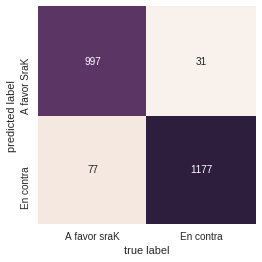

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

mat = confusion_matrix(y_test, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['A favor sraK', 'En contra'], 
            yticklabels=['A favor SraK', 'En contra'])

plt.xlabel('true label')
plt.ylabel('predicted label')


In [42]:
pred = model.predict(['Keiko es una mujer con valores y es victima de una persecusion politica y es una mujer honesta #KeikoPresaPolitica  #FelizMiercoles'])
print('A favor SraK' if pred[0] == 0 else 'En contra')


A favor SraK


In [43]:
pred = model.predict(['Los Fujimori son el cancer del pais, muy bien Domingo perez . A celebrar este dia #KeikoAlPenal #KeikOdrebech'])
print('A favor SraK' if pred[0] == 0 else 'En contra')


En contra


In [0]:
from sklearn import svm

In [0]:
model= make_pipeline (TfidfVectorizer(),  svm.SVC(kernel='linear'))

In [46]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [47]:
labels=model.predict(X_test)
labels

array([1, 1, 0, ..., 1, 1, 0])

In [48]:
accuracy_score(y_test, labels)

0.9899211218229623

Text(91.68,0.5,'predicted label')

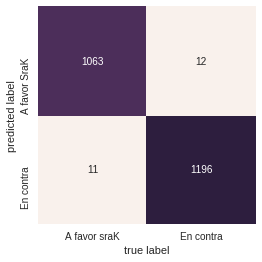

In [49]:
mat = confusion_matrix(y_test, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['A favor sraK', 'En contra'], 
            yticklabels=['A favor SraK', 'En contra'])

plt.xlabel('true label')
plt.ylabel('predicted label')

#### StopWords

In [50]:
!pip install gensim
!pip install pyLDAVis
!pip install textblob

    100% |████████████████████████████████| 23.6MB 1.4MB/s 
    100% |████████████████████████████████| 1.4MB 13.8MB/s 
    100% |████████████████████████████████| 133kB 28.6MB/s 
    100% |████████████████████████████████| 4.8MB 6.2MB/s 
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 552kB 24.4MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
    100% |████████████████████████████████| 1.6MB 10.0MB/s 
    100% |████████████████████████████████| 163kB 11.6MB/s 
    100% |████████████████████████████████| 225kB 14.2MB/s 
    100% |████████████████████████████████| 51kB 19.0MB/s 
  Running setup.py bdist_wheel for p

In [0]:
import pandas as pd
import numpy  
import string

In [52]:
# Importando todo NLTK
import nltk

# Tambien se puede importar modulos
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

#Downloading NLP corpus from NLTK 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
Cons = data['text']

In [0]:
# Stop words = Creacion de un conjunto unico desde el listado de stopwords en ingles que viene con el paquete NLTK. 

stop = set(stopwords.words('spanish'))

# Idem punto anterior, se excluyen signos de puntuacion 

exclude = set(string.punctuation) 

# Lemmatizacion de las palabras 
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [55]:
for i in Cons[1:5]: 
    print(clean(i))

sabemos si viene toledo hunde amigo ppk mediosarrodilladosnotransmitenlavajato keikopresapolitica
marchafujimorismounido vamos fuerzapopular keikopresapolitica fujimorilibertad masunidosquenunca
pedroolaechea asi actuado mafioso gorriti montesinos idl hace ano mediosarrodilladosnotransmitenlavajato keikopresapolitica
vizcarradictador razon contuvo disparar fiscal ultima entrevista mediosarrodilladosnotransmitenlavajato keikopresapolitica


In [56]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 7.9MB/s 


In [0]:
from wordcloud import WordCloud

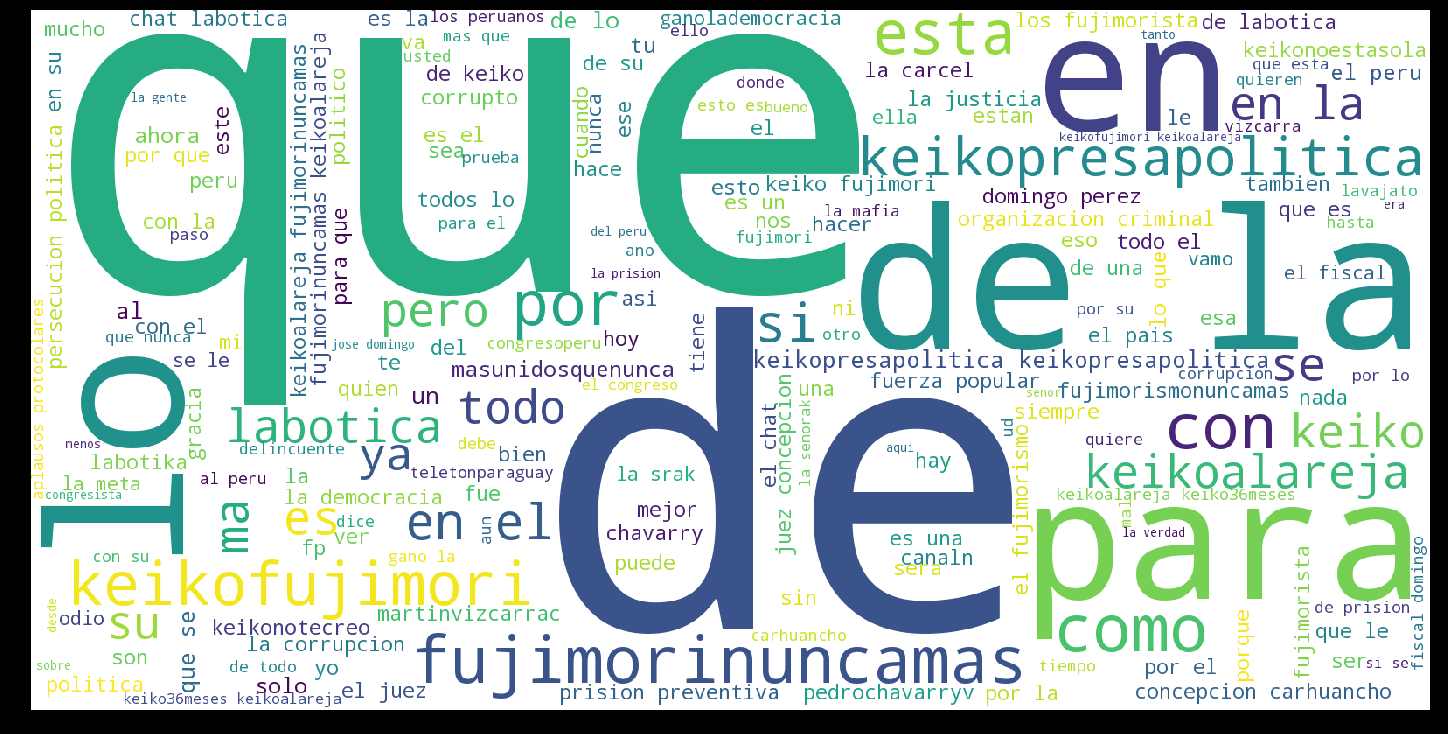

In [58]:
your_list=data['text'].astype('str') 
your_list=your_list.tolist()

# Display the generated image:

wordcloud2 = WordCloud(width=1600, height=800, margin=0, background_color='white').generate(' '.join(your_list))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [0]:

#Un poco tarde, pero esta solución evita errores de puntuación como # hashtag1, # hashtag2 (sin espacios), y la implementación es muy simple

import re,string

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def remove_arroba(text):
    r = re.findall('@[\w]*', text)
    for i in r:
        text = re.sub(i,'', text)
    
    return text
  
def remove_hashtag(text):
    r = re.findall('#[\w]*', text)
    for i in r:
        text = re.sub(i,'', text)
    
    return text


In [0]:
data['text'] = data['text'].map(lambda com : remove_arroba(com))

In [0]:
data['text'] = data['text'].map(lambda com : remove_hashtag(com))

In [0]:
data['text'] = data['text'].map(lambda com : strip_links(com))

In [0]:
data['text'] = data['text'].map(lambda com : clean(com))

In [64]:
data.head(9)

,author,text,favorite_count,retweet_count,created_at,hashtags,a_favor
0,mconsueloav,fujimoristas amigo simpatizantes quedan invitados marcha apoyo lideresa keiko fujimori,1,1,Thu Nov 08 23:50:59 +0000 2018,#bastadepersecusionpolitica#KeikoPresaPolitica,0
1,loyocm,sabemos si viene toledo hunde amigo ppk,0,1,Thu Nov 08 22:51:39 +0000 2018,#MediosArrodilladosNoTransmitenLavaJato#keikoPresaPolitica,0
2,Ishaser1,vamos,0,0,Thu Nov 08 22:44:58 +0000 2018,#MarchaFujimorismoUnido#FuerzaPopular#KeikoPresaPolítica#FujimoriLibertad#MásUnidosQueNunca,0
3,loyocm,asi actuado mafioso gorriti montesinos idl hace ano,2,1,Thu Nov 08 22:39:24 +0000 2018,#MediosArrodilladosNoTransmitenLavaJato#keikoPresaPolitica,0
4,loyocm,razon contuvo disparar fiscal ultima entrevista,1,1,Thu Nov 08 21:54:54 +0000 2018,#vizcarradictador#MediosArrodilladosNoTransmitenLavaJato#KeikoPresaPolitica,0
5,rayfull6,dios muerto,0,0,Thu Nov 08 21:05:44 +0000 2018,#keikonoestasola#KeikoPresaPolitica,0
6,danaloby,periodista trapea piso burla ignorancia jajajaja falto aplaudir magistral faena oleee,25,19,Thu Nov 08 20:00:00 +0000 2018,#ParásitoMiserable#KeikoNoEstáSola#KeikoPresaPolítica,0
7,el_profheta,alguie sabe dictadura fujimori precios subian gobiernos suguientes subio sube mercado limon sol kilo palta sol,0,0,Thu Nov 08 18:03:22 +0000 2018,#8Nov#KeikoPresaPolitica#Peru,0
8,perruanisimo,carcel puede tener linea bloqueadores celular chip internet ilimitado,0,0,Thu Nov 08 16:43:39 +0000 2018,#KeikoALaReja#KeikoPresaPolitica#señoraK#EntelYNetflixSeJuntaron,0


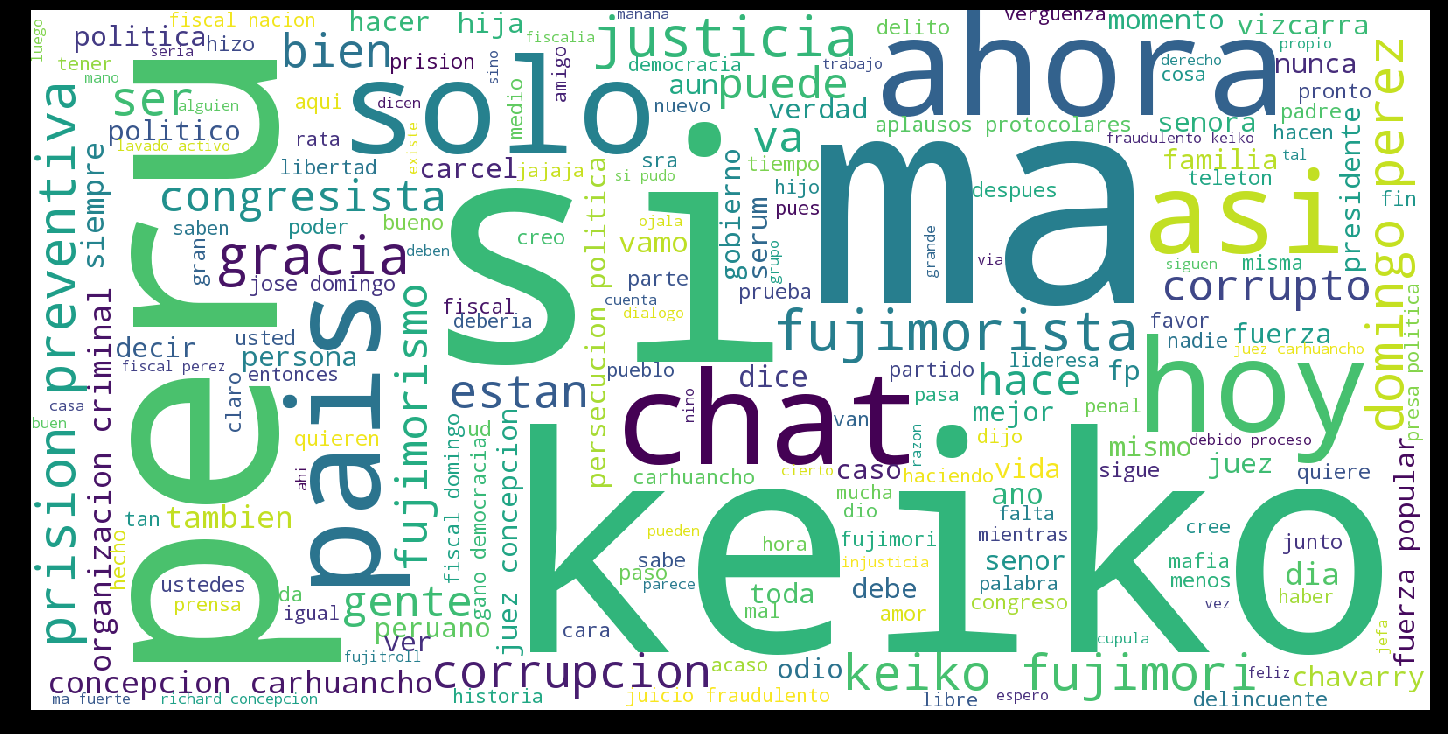

In [65]:
your_list=data['text'].astype('str') 
your_list=your_list.tolist()

# Display the generated image:

wordcloud2 = WordCloud(width=1600, height=800, margin=0, background_color='white').generate(' '.join(your_list))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [0]:
def clean_text(text):
    
    text = re.sub('fujimoristas', ' ', text)
    text = re.sub('fujimorista', ' ', text)
    text = re.sub('fujimorisma', ' ', text)
    text = re.sub('fujimorismo', ' ', text)
    text = re.sub('fujimoris', ' ', text)
    text = re.sub('fujimori', ' ', text)
    text = re.sub('peruanos', ' ', text)
    text = re.sub('peruano', ' ', text)
    text = re.sub('peru', ' ', text)
    text = re.sub('pais', ' ', text)
    text = re.sub('keiko', ' ', text)
    text = re.sub('si ', ' ', text)
    text = re.sub('ma ', ' ', text)
    text = re.sub(' va ', ' ', text)
    text = re.sub(' da ', ' ', text)
    text = re.sub('hoy ', ' ', text)
    text = re.sub('tan ', ' ', text)
    text = re.sub('ustedes ', ' ', text)
    text = re.sub('aun ', ' ', text)
    text = re.sub('vez ', ' ', text)
    text = re.sub('sra ', ' ', text)
    text = re.sub('solo ', ' ', text)
    text = re.sub(' senora ', ' ', text)
    text = re.sub('senor ', ' ', text)
    text = re.sub('dia ', ' ', text)
    text = re.sub('paso ', ' ', text)
    text = re.sub('jose ', ' ', text)
    text = re.sub('ahora ', ' ', text)
    text = re.sub(' hacer ', ' ', text)
    text = re.sub(' serum ', ' ', text)
    text = re.sub(' teleton ', ' ', text)
    text = re.sub(' ahi ', ' ', text)
    

    return text

In [0]:
data['text'] = data['text'].map(lambda com : clean_text(com))

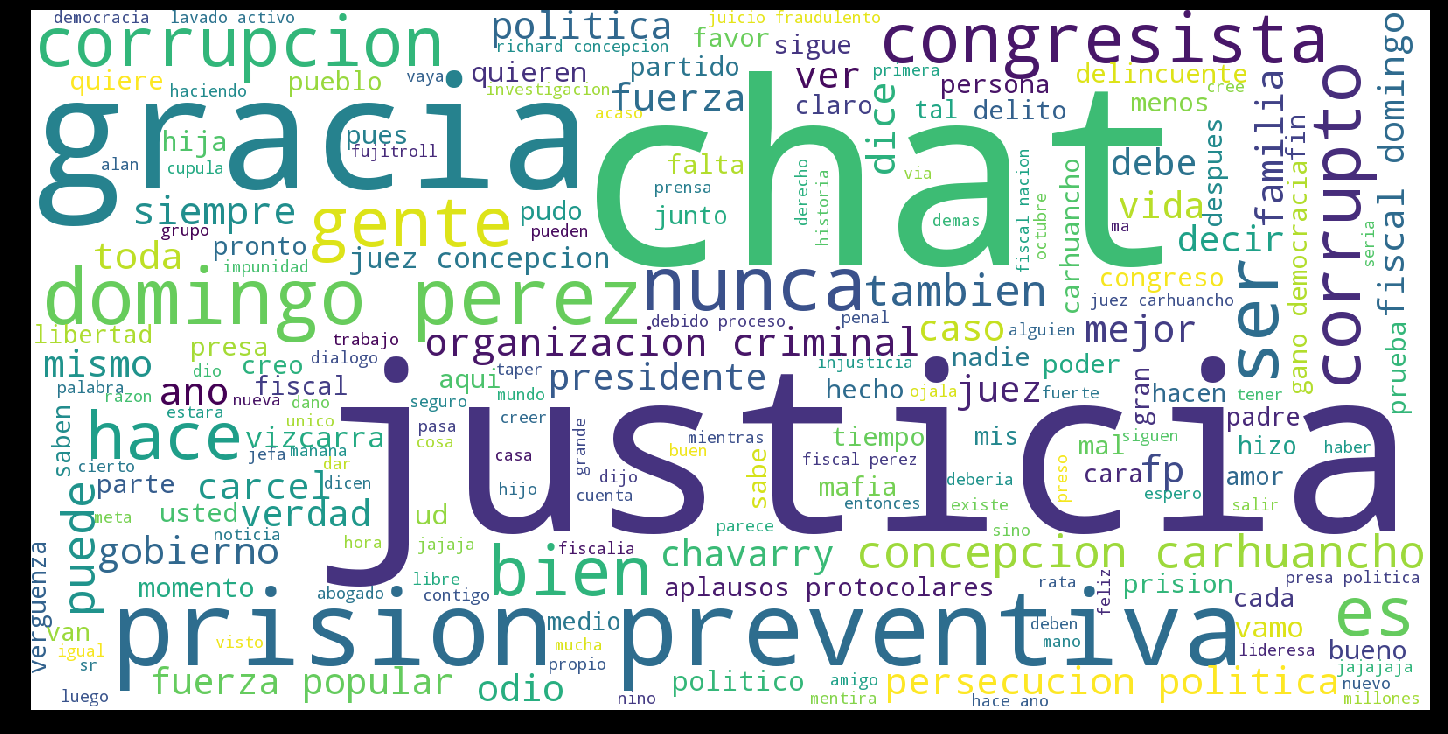

In [68]:
your_list=data['text'].astype('str') 
your_list=your_list.tolist()

# Display the generated image:

wordcloud2 = WordCloud(width=1600, height=800, margin=0, background_color='white').generate(' '.join(your_list))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [0]:
###Análisis despues de la Limpieza de Tw

In [70]:

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['a_favor'], test_size=0.30, random_state=3432)

print("Split finalizado")

Split finalizado


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

ml= TfidfVectorizer()
X_train_vec= ml.fit_transform(X_train)
X_train_vec.shape

(5324, 10331)

In [0]:
model= make_pipeline (TfidfVectorizer(), MultinomialNB())

In [73]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [74]:
labels=model.predict(X_test)
labels

array([1, 1, 1, ..., 1, 0, 1])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

0.820333041191937

Text(91.68,0.5,'predicted label')

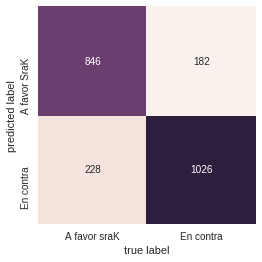

In [76]:
mat = confusion_matrix(y_test, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['A favor sraK', 'En contra'], 
            yticklabels=['A favor SraK', 'En contra'])

plt.xlabel('true label')
plt.ylabel('predicted label')

In [77]:
data['a_favor'].value_counts(normalize=True)

1    0.528399
0    0.471601
Name: a_favor, dtype: float64

In [0]:
model_svm= make_pipeline (TfidfVectorizer(),  svm.SVC(kernel='linear'))

In [79]:
model_svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [80]:
labels=model_svm.predict(X_test)
labels

array([1, 1, 0, ..., 1, 0, 1])

In [81]:
accuracy_score(y_test, labels)

0.8269062226117441

Text(91.68,0.5,'predicted label')

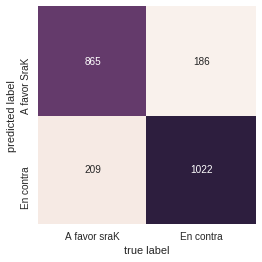

In [82]:
mat = confusion_matrix(y_test, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['A favor sraK', 'En contra'], 
            yticklabels=['A favor SraK', 'En contra'])

plt.xlabel('true label')
plt.ylabel('predicted label')

In [0]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [0]:

vectorizer = CountVectorizer(min_df=0.01, max_df=0.9,stop_words=stop)
data_vectorized = vectorizer.fit_transform(Cons)

In [0]:
tf_feature_names = vectorizer.get_feature_names()

In [86]:
lda_model = LatentDirichletAllocation(n_topics=4, max_iter=30, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [87]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
3      31.805839        1       1 -274.303558 -330.324524
2      23.345243        1       2  426.039459   19.620352
0      23.305761        1       3  250.905197 -505.650940
1      21.543157        1       4  -99.169014  194.948395, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
43    Default  443.000000      justicia  443.000000  30.0000  30.0000
30    Default  367.000000        fiscal  367.000000  29.0000  29.0000
9     Default  378.000000          chat  378.000000  28.0000  28.0000
73    Default  357.000000       prision  357.000000  27.0000  27.0000
62    Default  268.000000         perez  268.000000  26.0000  26.0000
82    Default  272.000000           ser  272.000000  25.0000  25.0000
7     Default  341.000000    carhuancho  341.000000  24.0000  24.0000
40    Default  330.000000          juez  330.000000  23.0000  23.0000
27    Default  229.000000       domingo  229.000000  22.0000  22.0000
66    Default  304.000000      politica  304.000000  21.0000  21.0000
4     Default  222.000000          bien  222.000000  20.0000  20.0000
36    Default  225.000000       gracias  225.000000  19.0000  19.0000
1     Default  210.000000           ano  210.000000  18.0000  18.0000
72    Default  212.000000    preventiva  212.000000  17.0000  17.0000
78    Default  194.000000         puede  194.000000  16.0000  16.0000
67    Default  189.000000      politico  189.000000  15.0000  15.0000
38    Default  189.000000          hace  189.000000  14.0000  14.0000
19    Default  197.000000      criminal  197.000000  13.0000  13.0000
16    Default  190.000000    corrupcion  190.000000  12.0000  12.0000
83    Default  185.000000       siempre  185.000000  11.0000  11.0000
88    Default  173.000000           ver  173.000000  10.0000  10.0000
6     Default  163.000000        carcel  163.000000   9.0000   9.0000
58    Default  169.000000  organizacion  169.000000   8.0000   8.0000
84    Default  165.000000       tambien  165.000000   7.0000   7.0000
24    Default  160.000000    democracia  160.000000   6.0000   6.0000
55    Default  201.000000         nunca  201.000000   5.0000   5.0000
70    Default  194.000000         presa  194.000000   4.0000   4.0000
12    Default  191.000000    concepcion  191.000000   3.0000   3.0000
87    Default  145.000000         vamos  145.000000   2.0000   2.0000
65    Default  144.000000         poder  144.000000   1.0000   1.0000
7      Topic1  341.152430    carhuancho  341.949771   1.1432  -2.5780
40     Topic1  330.165865          juez  330.960328   1.1431  -2.6107
66     Topic1  303.594681      politica  304.382439   1.1429  -2.6946
55     Topic1  200.652665         nunca  201.444931   1.1416  -3.1087
70     Topic1  193.461456         presa  194.250993   1.1414  -3.1452
12     Topic1  190.719277    concepcion  191.514308   1.1414  -3.1595
34     Topic1  179.749332         gente  180.541052   1.1411  -3.2188
63     Topic1  155.569943   persecucion  156.350296   1.1405  -3.3632
14     Topic1  148.368573      congreso  149.164369   1.1402  -3.4106
21     Topic1  148.267184          debe  149.071441   1.1401  -3.4113
71     Topic1  137.199247    presidente  137.989553   1.1398  -3.4889
57     Topic1  138.571711          odio  139.370440   1.1398  -3.4789
26     Topic1  129.893567          dice  130.687073   1.1394  -3.5436
10     Topic1  127.665998      chavarry  128.465665   1.1393  -3.5609
91     Topic1  123.091637      vizcarra  123.879326   1.1391  -3.5974
31     Topic1  123.773778            fp  124.567505   1.1391  -3.5919
89     Topic1  118.246051        verdad  119.042413   1.1388  -3.6376
13     Topic1  115.636924  congresistas  116.441939   1.1386  -3.6599
28     Topic1  111.622894       familia  112.415237   1.1384  -3.6952
54     Topic1  110.721699         nadie

In [0]:
pyLDAvis.save_html(panel, 'lda_topics_Keiko.html')

In [0]:
import seaborn as sns

In [0]:
Cons = data['text']

In [0]:
# Guardamos en una nueva serie

Cons_clean = [clean(comment).split() for comment in Cons]

In [92]:
from gensim import corpora, models 
import gensim

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [0]:
# converting the corpus into a document-term matrix. every unique term is assigned an index.

dictionary = corpora.Dictionary(Cons_clean)

In [0]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above. Usamos doc2bow de gensim

doc_term_matrix = [dictionary.doc2bow(comment) for comment in Cons_clean]

In [0]:

X_lda = pd.DataFrame(lda_Z)

In [0]:
df_lda = X_lda.copy()

In [0]:
df_lda['Topico'] = df_lda.idxmax(axis=1)

In [98]:
df_lda.head(12)

,0,1,2,3,Topico
0,0.125003,0.125003,0.622556,0.127439,2
1,0.250000,0.250000,0.250000,0.250000,0
2,0.125001,0.125001,0.624997,0.125001,2
3,0.083334,0.749999,0.083334,0.083334,1
4,0.125000,0.624999,0.125000,0.125000,1
5,0.250000,0.250000,0.250000,0.250000,0
6,0.250000,0.250000,0.250000,0.250000,0
7,0.250000,0.250000,0.250000,0.250000,0
8,0.083334,0.749999,0.083334,0.083334,1
9,0.050000,0.050018,0.050000,0.849981,3


In [0]:
Cons.reset_index(drop=True,inplace=True)
ATM = pd.Series(Cons)
ATM = ATM.astype(str)

In [100]:
ATM.head()

0      amigo simpatizantes quedan invitados marcha apoyo lideresa    
1                               sabemos  viene toledo hunde amigo ppk
2                                                               vamos
3                   a actuado mafioso gorriti montesinos idl hace ano
4                       razon contuvo disparar fiscal ulti entrevista
Name: text, dtype: object

In [0]:
# Guardamos en una nueva serie

ATM_clean = [clean(comment).split() for comment in ATM] 

In [0]:
from gensim import corpora, models 
import gensim

In [0]:
dictionary = corpora.Dictionary(ATM_clean)

In [104]:
# Vemos como queda con un print 
print(dictionary)

Dictionary(12141 unique tokens: ['amigo', 'apoyo', 'invitados', 'lideresa', 'marcha']...)


In [0]:
doc_term_matrix = [dictionary.doc2bow(comment) for comment in ATM_clean]

In [0]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [0]:
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=50)

In [108]:
# Resultados: vemos las 8 palabras mas probables dentro de cada topico y podemos inferir de que trata cada uno.

print(ldamodel.print_topics(num_topics=4, num_words=10))

[(5, '0.024*"carhuancho" + 0.019*"juez" + 0.019*"chat" + 0.014*"concepcion" + 0.014*"prision" + 0.011*"q" + 0.011*"preventiva" + 0.006*"domingo" + 0.006*"perez" + 0.006*"fiscal"'), (3, '0.018*"fiscal" + 0.017*"q" + 0.010*"perez" + 0.010*"x" + 0.008*"domingo" + 0.007*"justicia" + 0.007*"juicio" + 0.006*"chavarry" + 0.005*"criminal" + 0.004*"libre"'), (2, '0.007*"nunca" + 0.007*"q" + 0.006*"gracias" + 0.005*"ver" + 0.005*"vida" + 0.005*"gobierno" + 0.005*"tambien" + 0.005*"k" + 0.005*"corrupcion" + 0.004*"carcel"'), (0, '0.013*"democracia" + 0.012*"justicia" + 0.010*"protocolares" + 0.010*"gano" + 0.010*"aplausos" + 0.008*"bien" + 0.006*"ser" + 0.005*"pie" + 0.005*"nadie" + 0.004*"tambien"'), (4, '0.016*"q" + 0.008*"politica" + 0.008*"chat" + 0.006*"presidente" + 0.006*"presa" + 0.005*"criminal" + 0.005*"gente" + 0.005*"millones" + 0.005*"fuerza" + 0.005*"organizacion"')]


In [109]:
# Obtenemos el topico con mayor probabilidad. Podemos setear el valor de la probabilidad minima deseada

ldamodel.get_document_topics(bow=doc_term_matrix[12],minimum_probability=0.3)

[(2, 0.47408363)]

Construimos un dataframe de pandas compuesto por cada documentos, y las probabilidades que tiene de pertenecer a cada tópico.

In [0]:
d = []
for bow in doc_term_matrix:
    d.append(x[1] for x in ldamodel[bow])

topics_comments = pd.DataFrame(d)

Creamos un dataframe completo, con los comentarios originales, y el topico en donde la probabilidad de pertenencia sea la mayor como el tópico designado para ese documento Para ello usamos idxmax de pandas

In [0]:
topics = []
topics = topics_comments.idxmax(axis=1)
atm_topics = pd.concat([ATM, topics], axis=1)
atm_topics.columns = ['Comment', 'Topic']

In [0]:
from textblob import TextBlob

In [0]:
ATM_subjectivity = []
ATM_polarity = []
for num in range(len(ATM)):
    textblob_comment = TextBlob(str(ATM[num]))
    ATM_polarity.append(textblob_comment.polarity)
    ATM_subjectivity.append(textblob_comment.subjectivity)
    
ATM_polarity = pd.Series(ATM_polarity)
ATM_subjectivity = pd.Series(ATM_subjectivity)

In [114]:
ATM_subjectivity

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.900000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.900000
24      0.900000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.325000
44      0.000000
45      0.000000
46      0.000000
47      0.000000
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.0000

In [0]:
# Armamos un dataframe concatenando el dataframe de topico por comentario, con las series recien creadas de polaridad y subjetividad

ATM_topics_sentiment = pd.concat([atm_topics, ATM_polarity,ATM_subjectivity], axis=1)

# Nombramos las columnas del dataframe como 'Comment', 'Topic', 'Polarity', 'Subjectivity'

ATM_topics_sentiment.columns = ['Comment', 'Topic', 'Polarity', 'Subjectivity']



In [116]:
# Visualizamos con head 

ATM_topics_sentiment.sample(15)

,Comment,Topic,Polarity,Subjectivity
3530,narcos q indultaste x amor arte megaobras 2do gobiernoq nadie necesitaconcedidas odebrecht x amor tremendo sinverguenza cantes victoria q servil chavarry habra defienda,1,0.0,0.000000
6033,q sepa toda verdad sido medida grave requerida xq obstruido justicia varias maneras blindando corruptos digitando congreso segun intereses requerimiento impunidad,2,0.0,0.000000
4012,hijos uniremos fin triunfaremos contigo ganaremos corrupcion,1,0.0,0.000000
5577,gente agreguen grupo whatsapp p bo tambien,0,0.0,0.000000
1132,unidos nunca veremos libre triunfante,2,0.0,0.000000
370,usted respeta falso democrata dictador hdp comunidad internacional enterada movuimientos tomar poder absoluto mentiroso filibustero dictador castrista chavista,0,0.0,0.000000
2996,chincheros rio revuelto ganancia corruptos,5,0.0,0.000000
1303,prensa chicha endiosado mediocre pelele chavarry ponerle estate quieto,3,-0.5,1.000000
1632,lindo ver unido felicidad haber llegado meta disfrutar pocas cosas lindas,2,0.0,0.000000
1133,duros momentos unido nunca,2,0.0,0.000000


In [0]:
# Aplicamos CountVectorizer 

from sklearn.feature_extraction.text import CountVectorizer

texto = data['text']

no_features = 1500

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=0.012, max_features=no_features, stop_words=stop, lowercase= True, ngram_range=(1,1))
tf = tf_vectorizer.fit_transform(texto)
tf_feature_names = tf_vectorizer.get_feature_names()

In [0]:
# Importamos el paquete del modelo de Latent Dirichlet Allocation (LDA) que es el modelo que vamos a aplicar para detectar 
# tópicos

from sklearn.decomposition import LatentDirichletAllocation

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 1000
iteration: 2 of max_iter: 1000
iteration: 3 of max_iter: 1000
iteration: 4 of max_iter: 1000
iteration: 5 of max_iter: 1000
iteration: 6 of max_iter: 1000
iteration: 7 of max_iter: 1000
iteration: 8 of max_iter: 1000
iteration: 9 of max_iter: 1000
iteration: 10 of max_iter: 1000
iteration: 11 of max_iter: 1000
iteration: 12 of max_iter: 1000
iteration: 13 of max_iter: 1000
iteration: 14 of max_iter: 1000
iteration: 15 of max_iter: 1000
iteration: 16 of max_iter: 1000
iteration: 17 of max_iter: 1000
iteration: 18 of max_iter: 1000
iteration: 19 of max_iter: 1000
iteration: 20 of max_iter: 1000
iteration: 21 of max_iter: 1000
iteration: 22 of max_iter: 1000
iteration: 23 of max_iter: 1000
iteration: 24 of max_iter: 1000
iteration: 25 of max_iter: 1000
iteration: 26 of max_iter: 1000
iteration: 27 of max_iter: 1000
iteration: 28 of max_iter: 1000
iteration: 29 of max_iter: 1000
iteration: 30 of max_iter: 1000
iteration: 31 of max_iter: 1000
iteration: 32 of 

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 1000
iteration: 2 of max_iter: 1000
iteration: 3 of max_iter: 1000
iteration: 4 of max_iter: 1000
iteration: 5 of max_iter: 1000
iteration: 6 of max_iter: 1000
iteration: 7 of max_iter: 1000
iteration: 8 of max_iter: 1000
iteration: 9 of max_iter: 1000
iteration: 10 of max_iter: 1000
iteration: 11 of max_iter: 1000
iteration: 12 of max_iter: 1000
iteration: 13 of max_iter: 1000
iteration: 14 of max_iter: 1000
iteration: 15 of max_iter: 1000
iteration: 16 of max_iter: 1000
iteration: 17 of max_iter: 1000
iteration: 18 of max_iter: 1000
iteration: 19 of max_iter: 1000
iteration: 20 of max_iter: 1000
iteration: 21 of max_iter: 1000
iteration: 22 of max_iter: 1000
iteration: 23 of max_iter: 1000
iteration: 24 of max_iter: 1000
iteration: 25 of max_iter: 1000
iteration: 26 of max_iter: 1000
iteration: 27 of max_iter: 1000
iteration: 28 of max_iter: 1000
iteration: 29 of max_iter: 1000
iteration: 30 of max_iter: 1000
iteration: 31 of max_iter: 1000
iteration: 32 of 

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 1000
iteration: 2 of max_iter: 1000
iteration: 3 of max_iter: 1000
iteration: 4 of max_iter: 1000
iteration: 5 of max_iter: 1000
iteration: 6 of max_iter: 1000
iteration: 7 of max_iter: 1000
iteration: 8 of max_iter: 1000
iteration: 9 of max_iter: 1000
iteration: 10 of max_iter: 1000
iteration: 11 of max_iter: 1000
iteration: 12 of max_iter: 1000
iteration: 13 of max_iter: 1000
iteration: 14 of max_iter: 1000
iteration: 15 of max_iter: 1000
iteration: 16 of max_iter: 1000
iteration: 17 of max_iter: 1000
iteration: 18 of max_iter: 1000
iteration: 19 of max_iter: 1000
iteration: 20 of max_iter: 1000
iteration: 21 of max_iter: 1000
iteration: 22 of max_iter: 1000
iteration: 23 of max_iter: 1000
iteration: 24 of max_iter: 1000
iteration: 25 of max_iter: 1000
iteration: 26 of max_iter: 1000
iteration: 27 of max_iter: 1000
iteration: 28 of max_iter: 1000
iteration: 29 of max_iter: 1000
iteration: 30 of max_iter: 1000
iteration: 31 of max_iter: 1000
iteration: 32 of 

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 1000
iteration: 2 of max_iter: 1000
iteration: 3 of max_iter: 1000
iteration: 4 of max_iter: 1000
iteration: 5 of max_iter: 1000
iteration: 6 of max_iter: 1000
iteration: 7 of max_iter: 1000
iteration: 8 of max_iter: 1000
iteration: 9 of max_iter: 1000
iteration: 10 of max_iter: 1000
iteration: 11 of max_iter: 1000
iteration: 12 of max_iter: 1000
iteration: 13 of max_iter: 1000
iteration: 14 of max_iter: 1000
iteration: 15 of max_iter: 1000
iteration: 16 of max_iter: 1000
iteration: 17 of max_iter: 1000
iteration: 18 of max_iter: 1000
iteration: 19 of max_iter: 1000
iteration: 20 of max_iter: 1000
iteration: 21 of max_iter: 1000
iteration: 22 of max_iter: 1000
iteration: 23 of max_iter: 1000
iteration: 24 of max_iter: 1000
iteration: 25 of max_iter: 1000
iteration: 26 of max_iter: 1000
iteration: 27 of max_iter: 1000
iteration: 28 of max_iter: 1000
iteration: 29 of max_iter: 1000
iteration: 30 of max_iter: 1000
iteration: 31 of max_iter: 1000
iteration: 32 of 

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 1000
iteration: 2 of max_iter: 1000
iteration: 3 of max_iter: 1000
iteration: 4 of max_iter: 1000
iteration: 5 of max_iter: 1000
iteration: 6 of max_iter: 1000
iteration: 7 of max_iter: 1000
iteration: 8 of max_iter: 1000
iteration: 9 of max_iter: 1000
iteration: 10 of max_iter: 1000
iteration: 11 of max_iter: 1000
iteration: 12 of max_iter: 1000
iteration: 13 of max_iter: 1000
iteration: 14 of max_iter: 1000
iteration: 15 of max_iter: 1000
iteration: 16 of max_iter: 1000
iteration: 17 of max_iter: 1000
iteration: 18 of max_iter: 1000
iteration: 19 of max_iter: 1000
iteration: 20 of max_iter: 1000
iteration: 21 of max_iter: 1000
iteration: 22 of max_iter: 1000
iteration: 23 of max_iter: 1000
iteration: 24 of max_iter: 1000
iteration: 25 of max_iter: 1000
iteration: 26 of max_iter: 1000
iteration: 27 of max_iter: 1000
iteration: 28 of max_iter: 1000
iteration: 29 of max_iter: 1000
iteration: 30 of max_iter: 1000
iteration: 31 of max_iter: 1000
iteration: 32 of 

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 1000
iteration: 2 of max_iter: 1000
iteration: 3 of max_iter: 1000
iteration: 4 of max_iter: 1000
iteration: 5 of max_iter: 1000
iteration: 6 of max_iter: 1000
iteration: 7 of max_iter: 1000
iteration: 8 of max_iter: 1000
iteration: 9 of max_iter: 1000
iteration: 10 of max_iter: 1000
iteration: 11 of max_iter: 1000
iteration: 12 of max_iter: 1000
iteration: 13 of max_iter: 1000
iteration: 14 of max_iter: 1000
iteration: 15 of max_iter: 1000
iteration: 16 of max_iter: 1000
iteration: 17 of max_iter: 1000
iteration: 18 of max_iter: 1000
iteration: 19 of max_iter: 1000
iteration: 20 of max_iter: 1000
iteration: 21 of max_iter: 1000
iteration: 22 of max_iter: 1000
iteration: 23 of max_iter: 1000
iteration: 24 of max_iter: 1000
iteration: 25 of max_iter: 1000
iteration: 26 of max_iter: 1000
iteration: 27 of max_iter: 1000
iteration: 28 of max_iter: 1000
iteration: 29 of max_iter: 1000
iteration: 30 of max_iter: 1000
iteration: 31 of max_iter: 1000
iteration: 32 of 

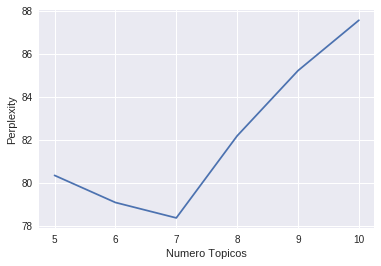

In [119]:
# Definimos el número óptimo de tópicos:

topicsRange = [i for i in range(3,8)]

lda_models = [LatentDirichletAllocation(n_topics=numTopics, doc_topic_prior=(0.5/numTopics), topic_word_prior=None, max_iter=1000,
                                verbose=1,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,n_jobs=-1) for numTopics in topicsRange]

for lda in lda_models:
    lda.fit(tf)
    
perplexities = [lda.perplexity(tf) for lda in lda_models]

plt.plot(topicsRange, perplexities)
plt.xlabel("Numero Topicos")
plt.ylabel("Perplexity")
plt.show()

In [122]:
# La perplejidad aumenta con el numero de topicos, un efecto comun en modelos con pocas observaciones.
# Definimos en 17 el numero de tópicos optimos para nuestro problema.

no_topics = 7

# Run LDA
lda_model = LatentDirichletAllocation(n_topics=no_topics, doc_topic_prior=(0.5/no_topics), topic_word_prior=None, max_iter=1000,
                                verbose=1,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,n_jobs=4)
lda_fit = lda_model.fit(tf)
lda_fit_transform = lda_model.fit_transform(tf)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 1000
iteration: 2 of max_iter: 1000
iteration: 3 of max_iter: 1000
iteration: 4 of max_iter: 1000
iteration: 5 of max_iter: 1000
iteration: 6 of max_iter: 1000
iteration: 7 of max_iter: 1000
iteration: 8 of max_iter: 1000
iteration: 9 of max_iter: 1000
iteration: 10 of max_iter: 1000
iteration: 11 of max_iter: 1000
iteration: 12 of max_iter: 1000
iteration: 13 of max_iter: 1000
iteration: 14 of max_iter: 1000
iteration: 15 of max_iter: 1000
iteration: 16 of max_iter: 1000
iteration: 17 of max_iter: 1000
iteration: 18 of max_iter: 1000
iteration: 19 of max_iter: 1000
iteration: 20 of max_iter: 1000
iteration: 21 of max_iter: 1000
iteration: 22 of max_iter: 1000
iteration: 23 of max_iter: 1000
iteration: 24 of max_iter: 1000
iteration: 25 of max_iter: 1000
iteration: 26 of max_iter: 1000
iteration: 27 of max_iter: 1000
iteration: 28 of max_iter: 1000
iteration: 29 of max_iter: 1000
iteration: 30 of max_iter: 1000
iteration: 31 of max_iter: 1000
iteration: 32 of 

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 1000
iteration: 2 of max_iter: 1000
iteration: 3 of max_iter: 1000
iteration: 4 of max_iter: 1000
iteration: 5 of max_iter: 1000
iteration: 6 of max_iter: 1000
iteration: 7 of max_iter: 1000
iteration: 8 of max_iter: 1000
iteration: 9 of max_iter: 1000
iteration: 10 of max_iter: 1000
iteration: 11 of max_iter: 1000
iteration: 12 of max_iter: 1000
iteration: 13 of max_iter: 1000
iteration: 14 of max_iter: 1000
iteration: 15 of max_iter: 1000
iteration: 16 of max_iter: 1000
iteration: 17 of max_iter: 1000
iteration: 18 of max_iter: 1000
iteration: 19 of max_iter: 1000
iteration: 20 of max_iter: 1000
iteration: 21 of max_iter: 1000
iteration: 22 of max_iter: 1000
iteration: 23 of max_iter: 1000
iteration: 24 of max_iter: 1000
iteration: 25 of max_iter: 1000
iteration: 26 of max_iter: 1000
iteration: 27 of max_iter: 1000
iteration: 28 of max_iter: 1000
iteration: 29 of max_iter: 1000
iteration: 30 of max_iter: 1000
iteration: 31 of max_iter: 1000
iteration: 32 of 

In [125]:
# Imprimimos el listado de tópicos

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 12
print('\nModelo LDA:')
display_topics(lda_fit, tf_feature_names, no_top_words)


Modelo LDA:
Topic 0:
ser corrupcion debe carcel poder nadie quieren millones quiere mafia popular ver
Topic 1:
chat politico tambien persona corruptos dice libre vida pueblo partido cada prensa
Topic 2:
bien ano hace toda democracia presidente congreso gano decir protocolares gran aplausos
Topic 3:
justicia prision preventiva criminal organizacion claro parte fuerza popular partido caso juicio
Topic 4:
gracias gente puede odio siempre mejor verdad amor penal meta ver nunca
Topic 5:
politica fuerza nunca presa persecucion gobierno vizcarra fp familia congresistas popular siempre
Topic 6:
carhuancho fiscal juez perez domingo concepcion vamos ver chavarry juicio caso congreso


In [0]:
# Importamos los paquetes para aplicar los modelos de clusterización

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet,fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline  

In [127]:
lda_fit_transform.shape

(7606, 7)

In [0]:
X_lda = pd.DataFrame(lda_fit_transform)

In [0]:
# Generamos un DF a partir de los tópicos de LDA

df_lda = X_lda.copy()

In [0]:
df_lda['Topico'] = df_lda.idxmax(axis=1)

In [0]:
data['id'] = range(1, len(data) + 1)

In [142]:
data.tail()

,author,text,favorite_count,retweet_count,created_at,hashtags,a_favor,id
4014,Eluigi1,ojala a recapaciten den cuenta adelante,0,0,Tue Oct 30 03:12:15 +0000 2018,#FujimorismoNuncaMas,1,7602
4015,Oso_Tuitero,vocero jajajajajajajajajajajajajajajajajajajjaajjaajajjajajajajajajajajajajajajajajajajajajajjajajajajajajajajajaja,4,1,Tue Oct 30 01:20:34 +0000 2018,#FujimorismoNuncaMás,1,7603
4016,Wilmr_Damian,contigo dialoga bancada peora venido demostrando ahorrate discursito querer paz,2,0,Tue Oct 30 01:09:57 +0000 2018,#FujimorismoNuncaMas,1,7604
4017,litmanndreamers,comparacion sesgada asesinando alguien banera privacidad importa denuncia hace publico chat prueba clara actitudes delincuenciales cupula fp,1,0,Tue Oct 30 00:41:25 +0000 2018,#FujimorismoNuncaMás,1,7605
4018,FernandoZegarr6,dialoga persona odian,98,20,Tue Oct 30 00:36:35 +0000 2018,#FujimorismoNuncaMas,1,7606


In [140]:
df_lda.head()

,0,1,2,3,4,5,6,Topico
0,0.047619,0.714285,0.047619,0.047619,0.047619,0.047619,0.047619,1
1,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0
2,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.714286,6
3,0.028571,0.028571,0.828571,0.028571,0.028571,0.028571,0.028571,2
4,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.714286,6


In [0]:
data.drop('id', axis=1, inplace=True)

In [143]:
df_lda.shape

(7606, 8)

In [158]:
data.shape

(7606, 7)

In [0]:
df_lda['id'] = data.index

In [153]:
df_lda.tail(9)

,0,1,2,3,4,5,6,Topico,id
7597,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0,4010
7598,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0,4011
7599,0.015873,0.460316,0.015873,0.015873,0.015873,0.460319,0.015873,5,4012
7600,0.047619,0.047619,0.714286,0.047619,0.047619,0.047619,0.047619,2,4013
7601,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0,4014
7602,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0,4015
7603,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0,4016
7604,0.020408,0.306124,0.306123,0.020408,0.020408,0.306121,0.020408,1,4017
7605,0.047619,0.714286,0.047619,0.047619,0.047619,0.047619,0.047619,1,4018


In [0]:
# Aplicamos el método de segmentación jerárquica

def eval_clusters_linkage(X, link_method):
    L = linkage(X, link_method)
    c, coph_dists = cophenet(L, pdist(X))
    print(link_method, c)
    

In [178]:
for i in ['ward','single','average','complete',"weighted","centroid"]:
    eval_clusters_linkage(X_lda, i)

ward 0.7662717431383662
single 0.6410281496490126
average 0.8283273894918097
complete 0.7794351585493627
weighted 0.7780304185838277
centroid 0.8330291185641684


In [0]:
def eval_clusters_dendo(X, link_method):
    L = linkage(X, link_method)
    c, coph_dists = cophenet(L, pdist(X))
    print(link_method, c)
    plt.figure(figsize=[10,10])
    plt.title('Dendrogram - Method: ' + link_method.title())
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(L, leaf_rotation=90., leaf_font_size=5.)

centroid 0.8330291185641684


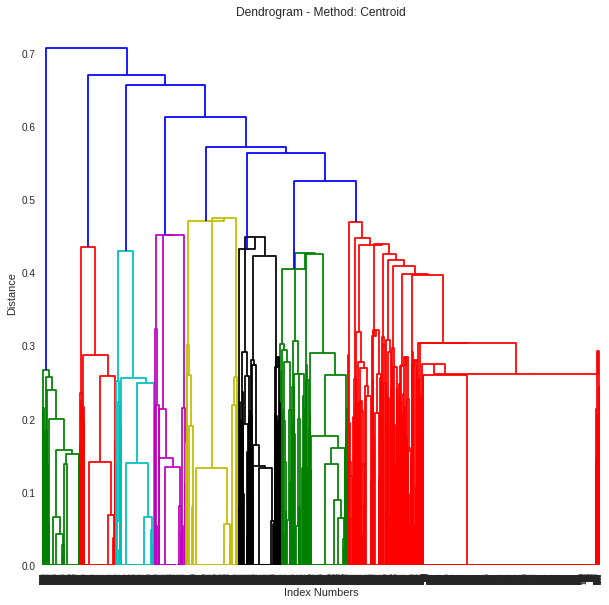

In [183]:
eval_clusters_dendo(X_lda,'centroid')

In [0]:
Z_lda = linkage(X_lda, 'centroid')
max_dist_lda = 0.5
clusters_lda = fcluster(Z_lda, max_dist_lda, criterion='distance')

In [0]:
clusters_jer_lda = pd.Series(clusters_lda)

In [198]:
clusters_jer_lda.max()

8

In [0]:
# Aplicamos K-means

from sklearn import cluster
import sklearn.metrics as sm

In [200]:
k_lda = clusters_jer_lda.max()
kmeans_lda = cluster.KMeans(n_clusters=k_lda, random_state=0) #Como siempre, suele ser una buena práctica fijar la semilla
kmeans_lda.fit(X_lda)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [0]:
km_labels_lda = kmeans_lda.labels_
km_centroids_lda = kmeans_lda.cluster_centers_

In [202]:
# Silhouette Score:

sm.silhouette_score(X_lda, km_labels_lda, metric='euclidean')

0.6105940159918092

In [203]:
# Calinsky-Harabaz Index:

sm.calinski_harabaz_score(X_lda, km_labels_lda)

4590.4118235755295

In [0]:
clusters_km_lda = pd.Series(km_labels_lda)

In [205]:
clusters_km_lda.isnull().sum()

0

In [0]:
df_lda = df_lda.reset_index()

In [0]:
df_lda['clusters_jer'] = clusters_jer_lda

In [0]:
df_lda['clusters_km'] = clusters_km_lda

In [209]:
# Tenemos un data frame con el peso de cada tópico, el tópico de mayor peso y el cluster de cada método para cada tweet

df_lda.sample(5)

,index,0,1,2,3,4,5,6,Topico,id,clusters_jer,clusters_km
2379,2379,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0,2379,8,2
2313,2313,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0,2313,8,2
7056,7056,0.047619,0.047619,0.714286,0.047619,0.047619,0.047619,0.047619,2,3469,3,5
7088,7088,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0,3501,8,2
2798,2798,0.006211,0.006211,0.006211,0.354034,0.006211,0.006211,0.614910,6,2798,8,4


In [0]:
data['id'] = range(1, len(data) + 1)

In [0]:
df_tit_clusters_lda = df_lda[df_lda['id']!=0].merge(data,how='inner',on= 'id',copy=True)[['text','Topico','clusters_jer','clusters_km']]

In [218]:
df_tit_clusters_lda.sample(5)

,text,Topico,clusters_jer,clusters_km
5474,sergayenel com tonada vacia nuevo oido,5,7,3
7165,presion informe consecuencias desprendan acciones tomara fiscalia fuerza popular debe resistir brutal imparable embate comunismo socios,0,8,2
732,dice trata sino pesi administracion justicia deberia sufrir ningun ciudadano,5,7,3
3114,ponga huevo huevo millonario ponga huevo huevo cesar cueste cueste ganar,1,5,1
1384,ser proscritos vida caviare asaltaron,5,7,5


In [219]:
pd.pivot_table(df_tit_clusters_lda,index =['clusters_km','text'])

Topico  clusters_jer
clusters_km text                                                                                                                                                                                                                                   
0                                                                                                                                                                                                                            0.000000      7.000000
                condena autoria mediata doctrina espanola sentencio presidente  usan mandar carcel increible                                                                                                                 0.000000      8.000000
                recluida penal anexo mujeres chorrillos via                                                                                                                                                                  0.000000      4.000000
                siempre quedo   nunca afronto procesos                                                                                                                                                                       0.000000      4.000000
               presa                                                                                                                                                                                                         0.000000      5.000000
               tuit llamaba sicarios fiscal  domingo perez juez richard concepcion carhuancho creen reaccionado hipocritas doble rasero indignados selectivos                                                                0.000000      4.000000
              agotaremos recursos legales proporciona nuevo codigo procesal penal injusticia trate revertir                                                                                                                  2.666667      4.000000
              amigo simpatizantes quedan invitados marcha apoyo lideresa                                                                                                                                                     4.000000      4.000000
              claro persecucion politica claro ejemplo debido proceso presuncion inocencia persecucion fiscal nacion persecucion partido mayoria congresal                                                                   0.000000      8.000000
              contigo fuerza                                                                                                                                                                                                 0.000000      6.000000
              convencidos inocencia sabemos buena mujer gente contigo final                                                                                                                                                  0.000000      4.000000
              debemos permitirlo                                                                                                                                                                                             0.000000      8.000000
              dentro penal viva   csmmm pronto tambien iran presos complices jajaja                                                                                                                                          0.000000      4.000000
              derrotara persecucion politica                                                                                                                                                                                 0.000000      4.000000
              emocionada departiendo internas penal santa monica viendo realidad vidas haciendo labor social tranquila                                                                                                       0.000000      4.000000
              hija genocida pudo fugar   habia planeado dilacion tiempo hab